In [1]:
# initialization
import numpy as np

# importing Qiskit
# from qiskit import IBMQ, Aer
from qiskit_aer import Aer
# from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

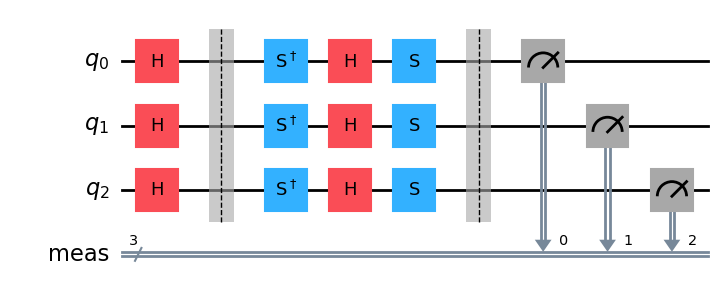

In [3]:
q_pigeon = QuantumCircuit(3)
q_pigeon.h([0,1,2])

q_pigeon.barrier()

q_pigeon.sdg([0,1,2])

q_pigeon.h([0,1,2])

q_pigeon.s([0,1,2])

q_pigeon.measure_all()

q_pigeon.draw(output="mpl")

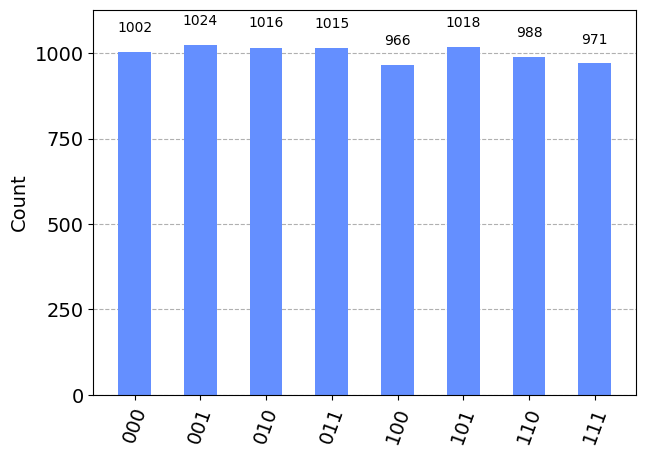

In [7]:
# run circuit

from qiskit_aer import QasmSimulator

simulator = QasmSimulator()

job = simulator.run(q_pigeon, shots=8000)
result = job.result()
counts = result.get_counts(q_pigeon)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

``


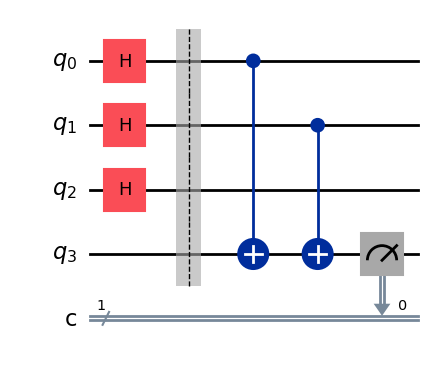

In [8]:
q_pigeons_same = QuantumCircuit(4,1)

q_pigeons_same.h([0,1,2])

q_pigeons_same.barrier()

q_pigeons_same.cx([0,1],[3,3])

q_pigeons_same.measure(3,0)

q_pigeons_same.draw(output="mpl")

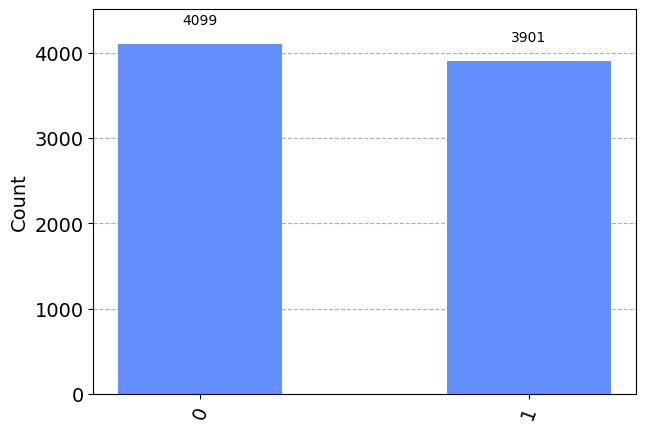

In [9]:
# Running the circuit 

job = simulator.run(q_pigeons_same, shots=8000)
result = job.result()
counts = result.get_counts(q_pigeons_same)

plot_histogram(counts)

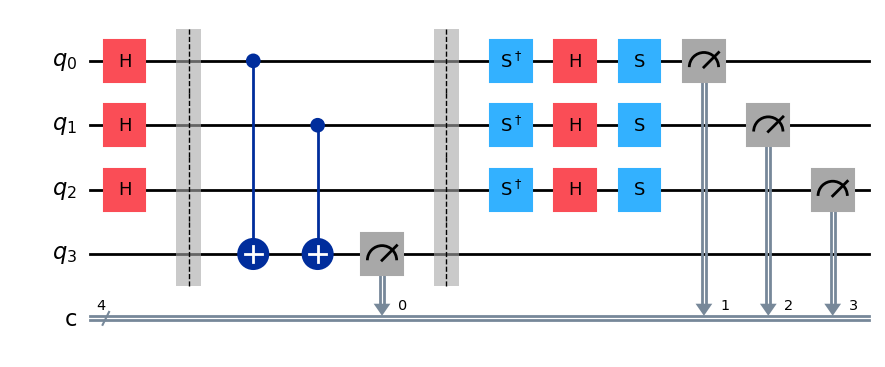

In [10]:
q_pigeons_combined = QuantumCircuit(4,4)

q_pigeons_combined.h([0,1,2])

q_pigeons_combined.barrier()

q_pigeons_combined.cx([0,1],[3,3])

q_pigeons_combined.measure(3,0)

q_pigeons_combined.barrier()

q_pigeons_combined.sdg([0,1,2])

q_pigeons_combined.h([0,1,2])

q_pigeons_combined.s([0,1,2])

q_pigeons_combined.measure([0,1,2],[1,2,3])

q_pigeons_combined.draw(output="mpl")

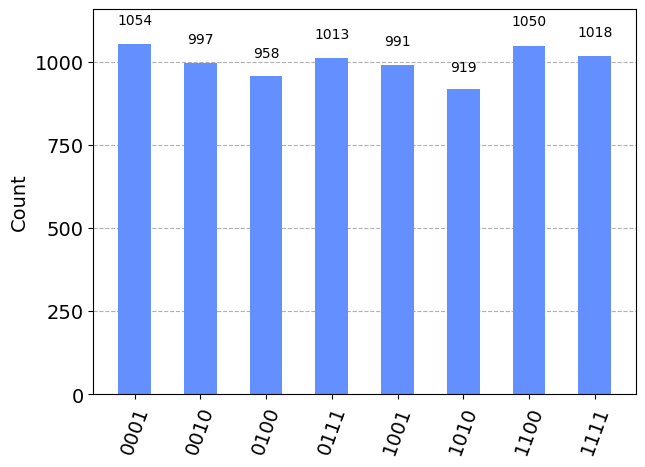

In [11]:
# Running the circuit 

job = simulator.run(q_pigeons_combined, shots=8000)
result = job.result()
counts = result.get_counts(q_pigeons_combined)

plot_histogram(counts)

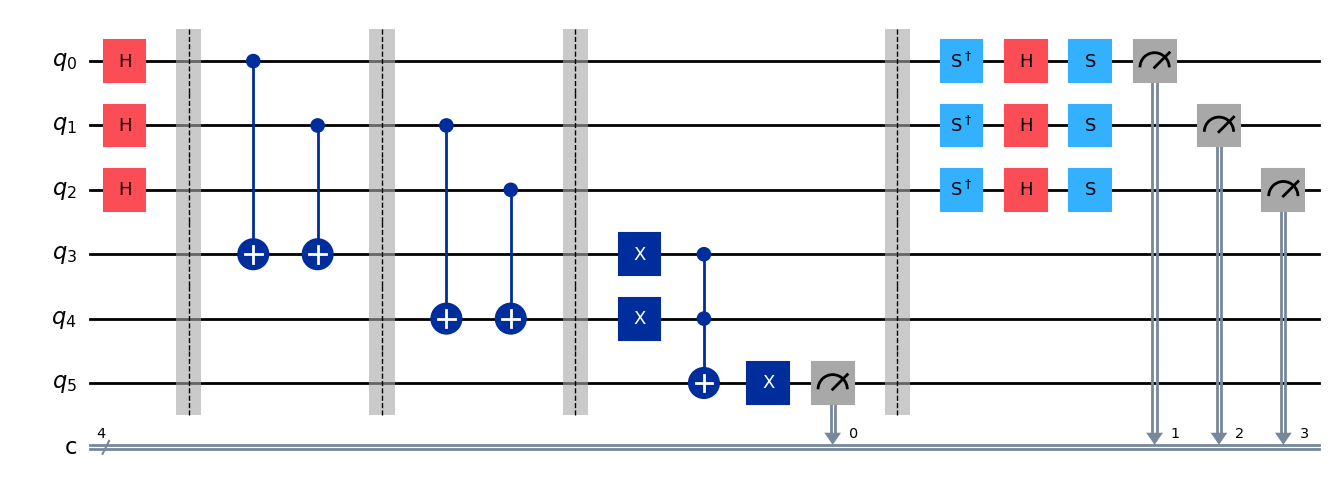

In [12]:
q_pigeons_triple = QuantumCircuit(6,4)

q_pigeons_triple.h([0,1,2])

q_pigeons_triple.barrier()

q_pigeons_triple.cx([0,1],[3,3]) # Check if qubits 0 and 1 are the same

q_pigeons_triple.barrier()

q_pigeons_triple.cx([1,2],[4,4]) # Check if qubits 1 and 2 are the same

q_pigeons_triple.barrier()

q_pigeons_triple.x([3,4]) #Check if both pairs of qubits are the same, meaning all three are the same

q_pigeons_triple.ccx(3,4,5)
q_pigeons_triple.x(5)

q_pigeons_triple.measure(5,0)

q_pigeons_triple.barrier()

q_pigeons_triple.sdg([0,1,2])

q_pigeons_triple.h([0,1,2])

q_pigeons_triple.s([0,1,2])

q_pigeons_triple.measure([0,1,2],[1, 2, 3])

q_pigeons_triple.draw(output="mpl")

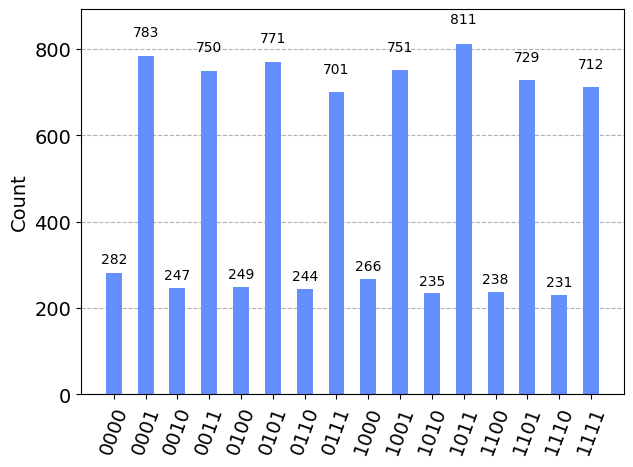

In [13]:
# Running the circuit 

job = simulator.run(q_pigeons_triple, shots=8000)
result = job.result()
counts = result.get_counts(q_pigeons_triple)

plot_histogram(counts)

Now the outcome 0000 has some chance of occurring, meaning that the outcome |+i +i +i> is compatible with all three quantum pigeons being in the same hole. 

## From the paper last circuit

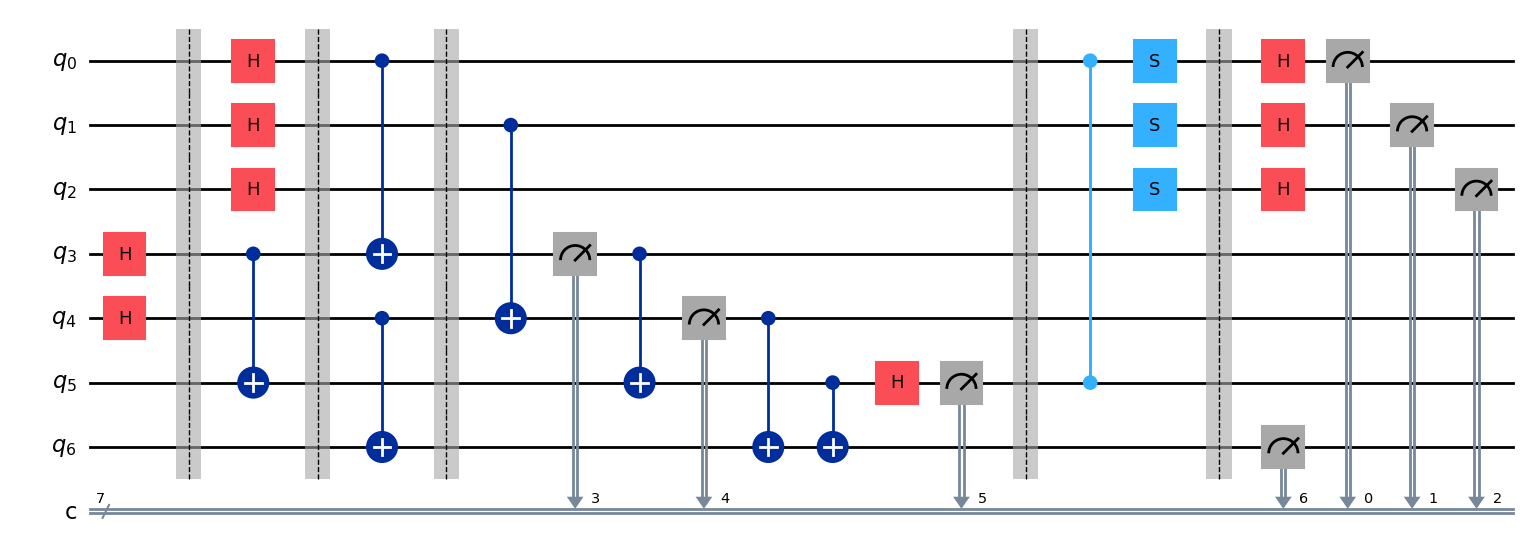

In [50]:
q_pigeons_paper = QuantumCircuit(7,7)

q_pigeons_paper.h([3,4])

q_pigeons_paper.barrier()

q_pigeons_paper.h([0,1,2])

q_pigeons_paper.cx(3, 5)

q_pigeons_paper.barrier()

q_pigeons_paper.cx(0, 3)
q_pigeons_paper.cx(4, 6)

q_pigeons_paper.barrier()

q_pigeons_paper.cx(1, 4)

q_pigeons_paper.measure(3,3)

q_pigeons_paper.cx(3, 5)

q_pigeons_paper.measure(4,4)

q_pigeons_paper.cx(4, 6)
q_pigeons_paper.cx(5, 6)

q_pigeons_paper.h(5)

q_pigeons_paper.measure(5,5)

q_pigeons_paper.barrier()

q_pigeons_paper.cz(0,5)

q_pigeons_paper.s([0,1,2])
q_pigeons_paper.barrier()
q_pigeons_paper.h([0,1,2])

q_pigeons_paper.measure(6,6)

q_pigeons_paper.measure(0,0)


q_pigeons_paper.measure(1,1)

q_pigeons_paper.measure(2,2)
q_pigeons_paper.draw(output="mpl")

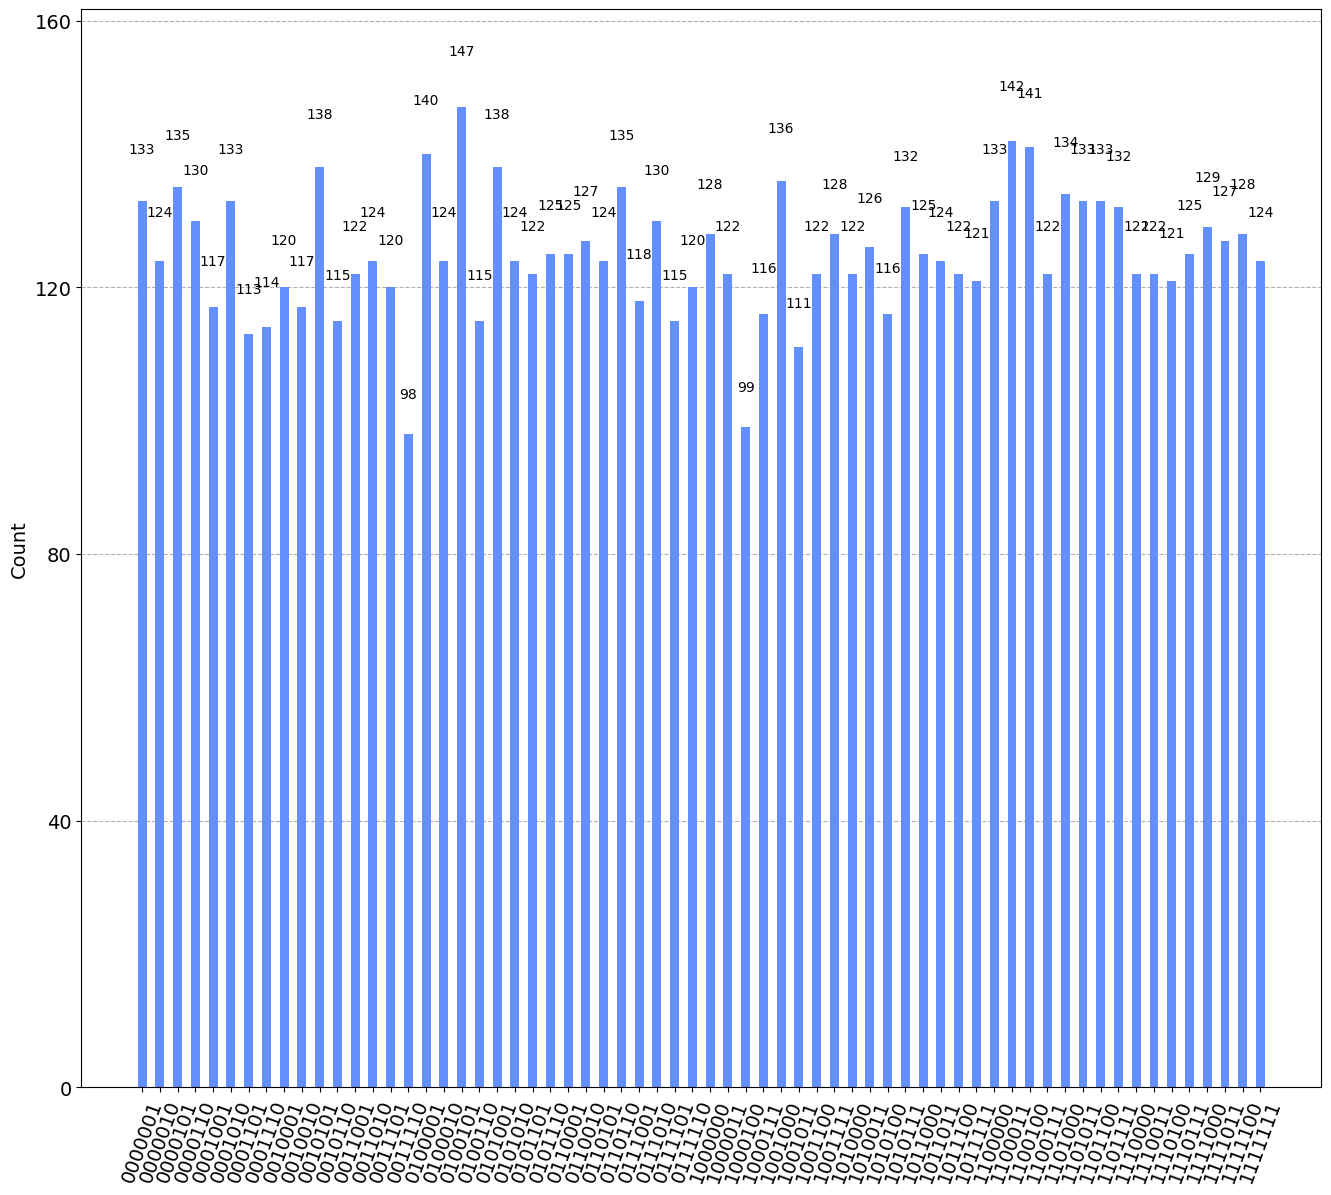

In [51]:
# Running the circuit 

job = simulator.run(q_pigeons_paper, shots=8000)
result = job.result()
counts = result.get_counts(q_pigeons_paper)

plot_histogram(counts, figsize=(16,14))